<h2><center>THE CHINESE UNIVERSITY OF HONG KONG<br /> 
    Department of Mathematics<br />
 MATH4280<br />
    Innovation and Design in Big Data Analytics</center></h2>

# Tutorial 9<a id='top'></a>

- <a href='#section5'>9.5 Develop Convolutional Neural Network Models</a>
- <a href='#section6'>9.6 Kernel method for SVM</a>
- <a href='#section7'>9.7 How to Visualize a Deep Learning Model</a>
- <a href='#section7'>9.8 How to Get Better Model Performance</a>


<a href='#top'>jump to the top</a>

## 9.7 How to Visualize a Deep Learning Model <a id='section7'></a>

In this section, you will discover how to use some of the slightly more advanced model features, such as reviewing learning curves and saving models for later use.

### 9.7.1 How to Visualize a Deep Learning Model

The architecture of deep learning models can quickly become large and complex.

As such, it is important to have a clear idea of the connections and data flow in your model. This is especially important if you are using the functional API to ensure you have indeed connected the layers of the model in the way you intended.

There are two tools you can use to visualize your model: a text description and a plot.

### Model Text Description
A text description of your model can be displayed by calling the summary() function on your model.

The example below defines a small model with three layers and then summarizes the structure.

In [13]:
# example of summarizing a model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(8,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))
# summarize the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                90        
                                                                 
 dense_6 (Dense)             (None, 8)                 88        
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 187 (748.00 Byte)
Trainable params: 187 (748.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 9.7.2 How to Plot Model Learning Curves

Learning curves are a plot of neural network model performance over time, such as calculated at the end of each training epoch.

Plots of learning curves provide insight into the learning dynamics of the model, such as whether the model is learning well, whether it is underfitting the training dataset, or whether it is overfitting the training dataset.

You can easily create learning curves for your deep learning models.

First, you must update your call to the fit function to include reference to a validation dataset. This is a portion of the training set not used to fit the model, and is instead used to evaluate the performance of the model during training.

You can split the data manually and specify the validation_data argument, or you can use the validation_split argument and specify a percentage split of the training dataset and let the API perform the split for you. The latter is simpler for now.

The fit function will return a history object that contains a trace of performance metrics recorded at the end of each training epoch. This includes the chosen loss function and each configured metric, such as accuracy, and each loss and metric is calculated for the training and validation datasets.

A learning curve is a plot of the loss on the training dataset and the validation dataset. We can create this plot from the history object using the Matplotlib library.

The example below fits a small neural network on a synthetic binary classification problem. A validation split of 30 percent is used to evaluate the model during training and the cross-entropy loss on the train and validation datasets are then graphed using a line plot.

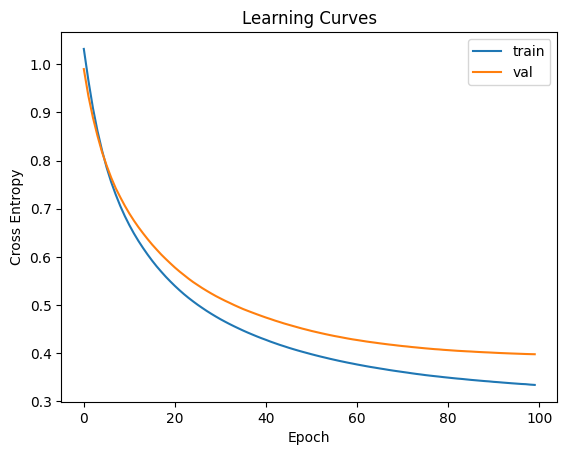

In [14]:
# example of plotting learning curves
from sklearn.datasets import make_classification
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
# create the dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# determine the number of input features
n_features = X.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))
# compile the model
sgd = SGD(learning_rate=0.001, momentum=0.8)
model.compile(optimizer=sgd, loss='binary_crossentropy')
# fit the model
history = model.fit(X, y, epochs=100, batch_size=32, verbose=0, validation_split=0.3)
# plot learning curves
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

Running the example fits the model on the dataset. At the end of the run, the history object is returned and used as the basis for creating the line plot.

The cross-entropy loss for the training dataset is accessed via the ‘loss‘ key and the loss on the validation dataset is accessed via the ‘val_loss‘ key on the history attribute of the history object.

### 9.7.3 How to Save and Load Your Model

Training and evaluating models is great, but we may want to use a model later without retraining it each time.

This can be achieved by saving the model to file and later loading it and using it to make predictions.

This can be achieved using the save() function on the model to save the model. It can be loaded later using the load_model() function.

The model is saved in H5 format, an efficient array storage format. As such, you must ensure that the h5py library is installed on your workstation. This can be achieved using pip; for example:

In [15]:
# import sys
# !{sys.executable} -m pip install h5py

The example below fits a simple model on a synthetic binary classification problem and then saves the model file.

In [16]:
# example of saving a fit model
from sklearn.datasets import make_classification
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
# create the dataset
X, y = make_classification(n_samples=1000, n_features=4, n_classes=2, random_state=1)
# determine the number of input features
n_features = X.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))
# compile the model
sgd = SGD(learning_rate=0.001, momentum=0.8)
model.compile(optimizer=sgd, loss='binary_crossentropy')
# fit the model
model.fit(X, y, epochs=100, batch_size=32, verbose=0, validation_split=0.3)
# save model to file
model.save('model.h5')

c:\Users\kinla\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Running the example fits the model and saves it to file with the name ‘model.h5‘.

We can then load the model and use it to make a prediction, or continue training it, or do whatever we wish with it.

The example below loads the model and uses it to make a prediction.

In [17]:
# example of loading a saved model
from sklearn.datasets import make_classification
from tensorflow.keras.models import load_model
# create the dataset
X, y = make_classification(n_samples=1000, n_features=4, n_classes=2, random_state=1)
# load the model from file
model = load_model('model.h5')
# make a prediction
row = [1.91518414, 1.14995454, -1.52847073, 0.79430654]
yhat = model.predict([row])
print('Predicted: %.3f' % yhat[0])

1/1 [==============================] - 0s 45ms/step
Predicted: 0.839


C:\Users\kinla\AppData\Local\Temp\ipykernel_14940\2288827104.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Predicted: %.3f' % yhat[0])


<a href='#top'>jump to the top</a>

## 9.8 How to Get Better Model Performance <a id='section8'></a>

In this section, you will discover some of the techniques that you can use to improve the performance of your deep learning models.

A big part of improving deep learning performance involves avoiding overfitting by slowing down the learning process or stopping the learning process at the right time.

### 9.8.1 How to Reduce Overfitting With Dropout
Dropout is a clever regularization method that reduces overfitting of the training dataset and makes the model more robust.

This is achieved during training, where some number of layer outputs are randomly ignored or “dropped out.” This has the effect of making the layer look like – and be treated like – a layer with a different number of nodes and connectivity to the prior layer.

Dropout has the effect of making the training process noisy, forcing nodes within a layer to probabilistically take on more or less responsibility for the inputs.

You can add dropout to your models as a new layer prior to the layer that you want to have input connections dropped-out.

This involves adding a layer called Dropout() that takes an argument that specifies the probability that each output from the previous to drop. E.g. 0.4 means 40 percent of inputs will be dropped each update to the model.

You can add Dropout layers in MLP, CNN, and RNN models, although there are also specialized versions of dropout for use with CNN and RNN models that you might also want to explore.

The example below fits a small neural network model on a synthetic binary classification problem.

A dropout layer with 50 percent dropout is inserted between the first hidden layer and the output layer.

In [18]:
# example of using dropout
from sklearn.datasets import make_classification
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from matplotlib import pyplot
# create the dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# determine the number of input features
n_features = X.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')
# fit the model
model.fit(X, y, epochs=100, batch_size=32, verbose=0)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                210       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 221 (884.00 Byte)
Trainable params: 221 (884.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 9.8.2 How to Accelerate Training With Batch Normalization

The scale and distribution of inputs to a layer can greatly impact how easy or quickly that layer can be trained.

This is generally why it is a good idea to scale input data prior to modeling it with a neural network model.

Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks.

You can use batch normalization in your network by adding a batch normalization layer prior to the layer that you wish to have standardized inputs. You can use batch normalization with MLP, CNN, and RNN models.

This can be achieved by adding the BatchNormalization layer directly.

The example below defines a small MLP network for a binary classification prediction problem with a batch normalization layer between the first hidden layer and the output layer.

In [19]:
# example of using batch normalization
from sklearn.datasets import make_classification
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from matplotlib import pyplot
# create the dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# determine the number of input features
n_features = X.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))
model.summary()
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')
# fit the model
model.fit(X, y, epochs=100, batch_size=32, verbose=0)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 10)                210       
                                                                 
 batch_normalization (Batch  (None, 10)                40        
 Normalization)                                                  
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 261 (1.02 KB)
Trainable params: 241 (964.00 Byte)
Non-trainable params: 20 (80.00 Byte)
_________________________________________________________________


### 9.8.3 How to Halt Training at the Right Time With Early Stopping

Neural networks are challenging to train.

Too little training and the model is underfit; too much training and the model overfits the training dataset. Both cases result in a model that is less effective than it could be.

One approach to solving this problem is to use early stopping. This involves monitoring the loss on the training dataset and a validation dataset (a subset of the training set not used to fit the model). As soon as loss for the validation set starts to show signs of overfitting, the training process can be stopped.

Early stopping can be used with your model by first ensuring that you have a validation dataset. You can define the validation dataset manually via the validation_data argument to the fit() function, or you can use the validation_split and specify the amount of the training dataset to hold back for validation.

You can then define an EarlyStopping and instruct it on which performance measure to monitor, such as ‘val_loss‘ for loss on the validation dataset, and the number of epochs to observed overfitting before taking action, e.g. 5.

This configured EarlyStopping callback can then be provided to the fit() function via the “callbacks” argument that takes a list of callbacks.

This allows you to set the number of epochs to a large number and be confident that training will end as soon as the model starts overfitting. You might also like to create a learning curve to discover more insights into the learning dynamics of the run and when training was halted.

The example below demonstrates a small neural network on a synthetic binary classification problem that uses early stopping to halt training as soon as the model starts overfitting (after about 50 epochs).

In [20]:
# example of using early stopping
from sklearn.datasets import make_classification
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
# create the dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# determine the number of input features
n_features = X.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')
# configure early stopping
es = EarlyStopping(monitor='val_loss', patience=5)
# fit the model
history = model.fit(X, y, epochs=200, batch_size=32, verbose=0, validation_split=0.3, callbacks=[es])

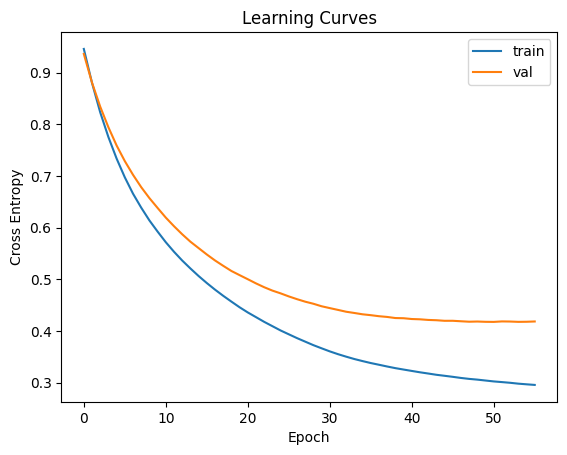

In [21]:
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

<a href='#top'>jump to the top</a>